# The Safest Neighborhood in Pittsburgh

### Introduction

By using all the datasets given to us by WPRDC, we ended up narrowing the evidence for the best neighborhoods down to the number of arrests, the number and location of prisoners in Alleghany County, and the number of parks. Our overall metric was to decide what the safest neighborhood in Pittsburgh is. We ultimately chose this metric because there are a lot of different ways to go about gathering evidence through a multitude of datasets, allowing us to have options on what data we wanted to include. The reason we decided to go with a wide variety of datasets is to show the overall general safety of the neighborhoods, not just based one type of data. The number of arrests and prisoners along with their location go to show the areas with the lowest amount of crime, while the number of parks 
helps show the general community and safety of a neighborhood.

## Arrest Dataset

The metric I chose was the amount of arrests per neighborhoods. The dataset I used was already between the years 2016-2022, so I decided to use all the data and only display the top neighborhoods with the least amount of arrests.


First we imported the arrest data through pandas and intialized matplotlib which we will use later for the necessary graphs. Next, we imported and read through the arrest dataset. Because the data is a csv, we are able to use pd.read_csv to read the dataset. Let's then use arrestData.head() to display the first five rows of data. This is useful as we can see the type of data being analyzed and since this dataset has thousands of entries, it's better than displaying the entirety of the datset. 

In [2]:
#imports panda and matplotlib
import pandas as pd
%matplotlib inline

#import and read the arrests dataset
arrestData = pd.read_csv('https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f')

#display first five rows of data
arrestData.head(5)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


For the next step we begin again by importing pandas and matplotlib. We then initialize a dictionary so we can sort through the data easily. Using pd.read_csv we are able to read through the dataset once again. Using two separate for loops, we are able to read through both the columns within the dataset, and the values within a specified column. The first for loop goes through the columns in arrestData and within the loop, the column we want which is 'neighborhoods' is selected out of all the columns. The second for loop then goes through every value in 'neighborhoods' and if the value doesn't already exist within the dictionary the value becomes 1, otherwise 1 is added to the already existing value. This allows us to count how many arrests occured within which neighborhoods and figure out which neighborhoods are the safest based on the output.

In [3]:
#imports panda and matplotlib
import pandas as pd
%matplotlib inline

#intialize dictionary and read through dataset
arrestDictionary = dict()
arrestData = pd.read_csv('https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f')

#loops through specified column in dataset
for column in arrestData:
    #initializes the specified column and iterates through its values
    neighborhoods = arrestData["INCIDENTNEIGHBORHOOD"].values

#loops through every value in the neighborhoods column
for value in neighborhoods:
    
    #states if value isn't already in the dictionary, the value becomes 1
    if value not in arrestDictionary:
        arrestDictionary[value] = 1
    else:
        #states if value is already in dictionary, 1 is added to the value
        arrestDictionary[value] = arrestDictionary[value] + 1

#prints out dictionary
print(arrestDictionary)

{'Bloomfield': 880, 'Outside City': 274, 'Westwood': 203, 'East Allegheny': 1893, 'Crafton Heights': 513, 'Greenfield': 473, 'Brookline': 1196, 'Regent Square': 32, 'East Liberty': 1652, nan: 2203, 'East Hills': 1026, 'Carrick': 2102, 'Allegheny Center': 1122, 'South Side Flats': 3053, 'Sheraden': 1132, 'East Carnegie': 47, 'Golden Triangle/Civic Arena': 83, 'Point Breeze North': 249, 'Perry South': 954, 'Allentown': 855, 'North Shore': 722, 'Marshall-Shadeland': 1332, 'Central Oakland': 469, 'Middle Hill': 844, 'Strip District': 440, 'Lincoln-Lemington-Belmar': 1148, 'Central Northside': 23, 'Troy Hill-Herrs Island': 6, 'Highland Park': 502, 'Homewood North': 1742, 'Northview Heights': 626, 'Brighton Heights': 978, 'Hazelwood': 1225, 'Perry North': 554, 'Bedford Dwellings': 582, 'Elliott': 588, 'Beechview': 1076, 'Fineview': 750, 'Glen Hazel': 143, 'Spring Hill-City View': 630, 'Bluff': 1313, 'Manchester': 439, 'Homewood West': 699, 'Outside County': 49, 'Point Breeze': 283, 'Homewood

Since the dictionary simply printed out is quite difficult to understand, we converted the dictionary into a series so we could then sort all the values in ascending order therefore making it a lot easier to comprehend.

In [4]:
#changes the dictionary to a series
arrestDataSeries = pd.Series(arrestDictionary, name = 'Arrests Per Neighborhood')

#sorts through the values within the series and places then in ascending order
arrestDataSeries.sort_values()[:]

Mt. Oliver Neighborhood         2
Troy Hill-Herrs Island          6
Mt. Oliver Boro                18
Central Northside              23
Ridgemont                      32
                             ... 
East Allegheny               1893
Carrick                      2102
NaN                          2203
South Side Flats             3053
Central Business District    3570
Name: Arrests Per Neighborhood, Length: 99, dtype: int64

We then decided to sort the series again but this time we used the first 20 neighborhoods with the least amount of arrests. This makes it easier for us to graph and visualize the data later rather than trying to vizualize every single neighborhood.

In [5]:
#displays the first 20 neighborhoods within the sorted series
arrestDataSeries.sort_values()[:20]

Mt. Oliver Neighborhood          2
Troy Hill-Herrs Island           6
Mt. Oliver Boro                 18
Central Northside               23
Ridgemont                       32
Regent Square                   32
Chartiers City                  38
Swisshelm Park                  38
New Homestead                   38
St. Clair                       45
East Carnegie                   47
Outside County                  49
Outside State                   57
Summer Hill                     63
Oakwood                         78
Golden Triangle/Civic Arena     83
Hays                            98
Windgap                        103
Fairywood                      108
Mount Oliver                   111
Name: Arrests Per Neighborhood, dtype: int64

Now that we have our first 20 neighborhoods set up and ordered, let's make a graph of the data so we can see the comparaison visually.

Text(0, 0.5, 'Number of Arrests')

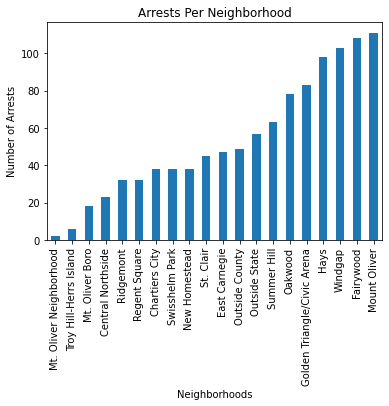

In [7]:
#import matplotlib to graph the data
import matplotlib.pyplot as plt

#plots the arrest series of the first 20 neighborhoods in a bar graph
arrestDataSeries.sort_values()[:20].plot.bar()

#applies labels to the title and axes
plt.title('Arrests Per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Number of Arrests')

Looking at the graph above, we can see the general upward trend of the amount of arrests. We can see the first 10 neighborhoods are all quite low but there is a small spike of arrests toward the right side of the graph. It will be quite intriguing to compare this data with the other two datasets and see which neighborhoods are truly the safest.

## Crime Dataset

In [ ]:
import pandas as pd
%matplotlib inline
#Imports pandas and the plot lib
#import matplotlib to graph the data
import matplotlib.pyplot as plt
df = pd.read_csv("Crime.csv")
#Reads the crime info excel into a variable
my_List=dict()
#Creates list
my_List= df.groupby("INCIDENTNEIGHBORHOOD")['INCIDENTNEIGHBORHOOD'].count()
#Organizes the list by neighborhoods and the sum of the crimes within the neighborhood. I created a quantity section in the excel and just added the sums of all of them
my_List.sort_values()[:50]

This code imports pandas and matplotlib. It then reads the crime data from 2016 to present and adds one to every crime that happened in the neighborhood. I did this by adding a quantity column and adding one to every cell. This took two seconds with copy and paste and allows for easy addition.

In [ ]:
my_List.sort_values()[:20].plot.bar()
plt.title('Crimes Per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Number of Crimes')

This shows the top 20 neighborhoods that have the least amount of crime sense 2016. This graph clearly shows the safest neighborhoods with Mt. Oliver Neighborhood being on top.

In [ ]:
my_List[:20].plot.bar()
plt.title('Crimes Per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Number of Crimes')

This shows the sum of the first 20 neighborhoods within the data set.

In [ ]:
my_List.sort_values(ascending=[False])[:30].plot.bar()
plt.title('Crimes Per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Number of Crimes')

This shows the 30 most dangerous neighborhoods within Pittsburgh with South Side Flats being on top.

## Park Dataset

First we imported the parks data through pandas and intialized matplotlib. Next, we imported and read through the arrest dataset. We then used df_parks_data.head(5) to display the first five rows of data.

In [14]:
import pandas as pd
 
import matplotlib.pyplot as plt

df_parks_data = pd.read_csv('https://data.wprdc.org/datastore/dump/fa329e3d-89ff-4708-8ddf-81bfedcad11d')

df_parks_data.head(5)

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907


We then import pandas and matplotlib and initialize a dictionary in order to sort through the data. We are then able to read through both the columns within the dataset using for loops- the first goes through the columns in parks_data; second goes through every value in 'neighborhood' and if the value doesn't already exist within the dictionary the value becomes 1, if not, 1 is added to the already existing value. This allows us to determine the quantity of parks per neighborhood.

In [6]:
#imports panda and matplotlib
import pandas as pd
%matplotlib inline

#intialize dictionary and read through dataset
parksDictionary = dict()
df_parks_data = pd.read_csv('https://data.wprdc.org/datastore/dump/fa329e3d-89ff-4708-8ddf-81bfedcad11d')

#loops through specified column in dataset
for column in df_parks_data:
    #initializes the specified column and iterates through its values
    neighborhoods = df_parks_data["neighborhood"].values

#loops through every value in the neighborhoods column
for value in neighborhoods:
    
    #states if value isn't already in the dictionary, the value becomes 1
    if value not in parksDictionary:
        parksDictionary[value] = 1
    else:
        #states if value is already in dictionary, 1 is added to the value
        parksDictionary[value] = parksDictionary[value] + 1

#prints out dictionary
print(parksDictionary)

{'Beechview': 8, 'Crawford-Roberts': 3, 'North Shore': 3, 'Allegheny Center': 2, 'Central Business District': 10, 'Central Northside': 3, 'East Liberty': 12, 'Bedford Dwellings': 1, 'South Side Slopes': 7, 'South Side Flats': 6, 'Lower Lawrenceville': 3, 'Banksville': 2, 'South Oakland': 5, 'Homewood North': 2, 'Hazelwood': 6, 'Bon Air': 1, 'Central Oakland': 4, 'Brighton Heights': 4, 'Brookline': 3, 'Spring Garden': 2, 'Lincoln-Lemington-Belmar': 3, 'Windgap': 1, 'Troy Hill': 5, 'Westwood': 3, 'Perry South': 2, 'Homewood West': 1, 'Squirrel Hill South': 6, 'Strip District': 2, 'Arlington': 1, 'Stanton Heights': 1, 'Crafton Heights': 2, 'Upper Lawrenceville': 3, 'East Carnegie': 1, 'East Hills': 1, 'Point Breeze': 7, 'Allentown': 2, 'Duquesne Heights': 2, 'Mount Washington': 6, 'Esplen': 1, 'Fairywood': 1, 'Fineview': 2, 'Garfield': 3, 'Greenfield': 3, 'Larimer': 3, 'Bloomfield': 3, 'Perry North': 2, 'North Oakland': 1, 'Hays': 1, 'Elliott': 4, 'Highland Park': 2, 'Homewood South': 1, 

We then convert the dictionary to a series so it's easier to read.

In [7]:
#changes the dictionary to a series
parks_data_series = pd.Series(parksDictionary, name = 'parks per neighborhood')

#sorts through the values within the series and places then in ascending order
parks_data_series.sort_values()[:]

Squirrel Hill North           1
Arlington                     1
East Hills                    1
Homewood West                 1
Esplen                        1
                             ..
South Side Slopes             7
Point Breeze                  7
Beechview                     8
Central Business District    10
East Liberty                 12
Name: parks per neighborhood, Length: 73, dtype: int64

In [12]:
#displays the first 50 neighborhoods within the sorted series
parks_data_series.sort_values(ascending=False)[:50]

East Liberty                 12
Central Business District    10
Beechview                     8
South Side Slopes             7
Point Breeze                  7
Squirrel Hill South           6
Mount Washington              6
Sheraden                      6
Hazelwood                     6
South Side Flats              6
South Oakland                 5
Troy Hill                     5
Central Oakland               4
Brighton Heights              4
Marshall-Shadeland            4
Elliott                       4
Manchester                    3
Upper Lawrenceville           3
Bloomfield                    3
Spring Hill-City View         3
Carrick                       3
Crawford-Roberts              3
Larimer                       3
Lincoln-Lemington-Belmar      3
Westwood                      3
Garfield                      3
Brookline                     3
Beltzhoover                   3
Point Breeze North            3
Lower Lawrenceville           3
Swisshelm Park                3
Central 

We then sort the series again into the first 50 parks.

Text(0, 0.5, 'number of parks')

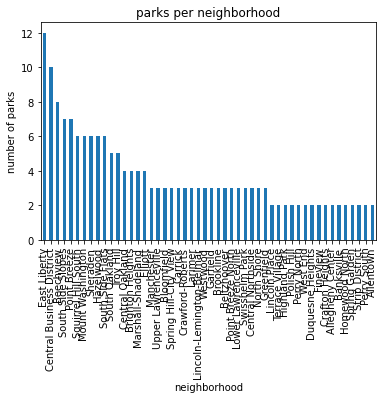

In [13]:
#import matplotlib to graph the data
import matplotlib.pyplot as plt

#plots the arrest series of the first 50 neighborhoods in a bar graph
parks_data_series.sort_values(ascending = False)[:50].plot.bar()

#applies labels to the title and axes
plt.title('parks per neighborhood')
plt.xlabel('neighborhood')
plt.ylabel('number of parks')

Above is the graph of all 50 neighborhoods and the number of parks within them. East Liberty is the neighborhood with the most parks coming in with 12 followed by the Central Business District with 10.

## Conclusions

#### Winner: Mt. Oliver Neighborhood

**Morgan:** Based on all the data provided, Mt. Oliver Neighborhood seems to be the safest neighborhood in Pittsburgh. The least amount of arrests and crime occurred in this neighborhood meaning it topped two out of three of the submetrics. Since I am not from Pittsburgh, my favorite neighborhood and really the only one I know is Central Oakland. I don't have enough insight to compare the two neighborhoods, but based on the data I believe Mt. Oliver Neighborhood is a great place to live.
    

**Luke:** Once I organized the data to see which neighborhoods committed the least crimes there were clear neighborhoods that were safer then other. The neighborhood with the least amount of crime was Mt. Oliver Boro which only had 93 crimes sense 2016. The next neighborhood with the least crime is Mt. Oliver Neighborhood with only 117 crimes sense 2016. The next three neighborhoods with the least amount of crime are Outside County, Troy Hill-Herrs Island, and Ridgemont. Sense with the park data showing no correlation between crime and arrest we just look at the arrest data to compare. Once looking at the arrest data we will see that Mt. Oliver Neighborhood has the least amount of arrests at only two. The Mt. Oliver Boro suprisingly had 18 arrests. From this data I think that the Mt. Oliver neighborhood is the safest neighborhood because it is second in the least amount of crime sicne 2016 and the least amount of arrests.
    
    
    
    
     
**Meagan:**